In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/wind_speed_laurel_nebraska.csv')
df.head()

,10 Min Std Dev,Time,10 Min Sampled Avg
0,2.73,2001-06-11 11:00,22.3
1,1.98,2001-06-11 11:10,23.0
2,1.87,2001-06-11 11:20,23.3
3,2.03,2001-06-11 11:30,22.0
4,3.10,2001-06-11 11:40,20.5


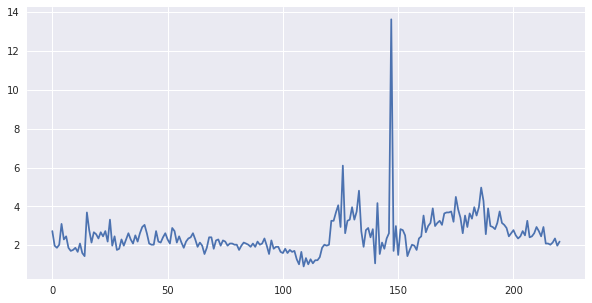

In [3]:
plt.figure(figsize=(10,5))
plt.plot(list(df['10 Min Std Dev']))
plt.show()

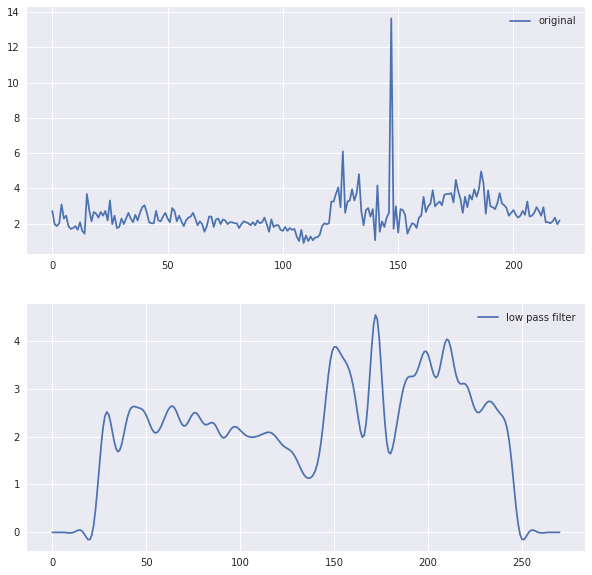

In [4]:
fc = 0.1
b = 0.08
N = int(np.ceil((4 / b)))
if not N % 2: N += 1
n = np.arange(N)
 
sinc_func = np.sinc(2 * fc * (n - (N - 1) / 2.))
window = 0.42 - 0.5 * np.cos(2 * np.pi * n / (N - 1)) + 0.08 * np.cos(4 * np.pi * n / (N - 1))
sinc_func = sinc_func * window
sinc_func = sinc_func / np.sum(sinc_func)

s = list(df['10 Min Std Dev'])
new_signal = np.convolve(s, sinc_func)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(list(df['10 Min Std Dev']),label='original')
plt.legend()
plt.subplot(2,1,2)
plt.plot(new_signal,label='low pass filter')
plt.legend()
plt.show()

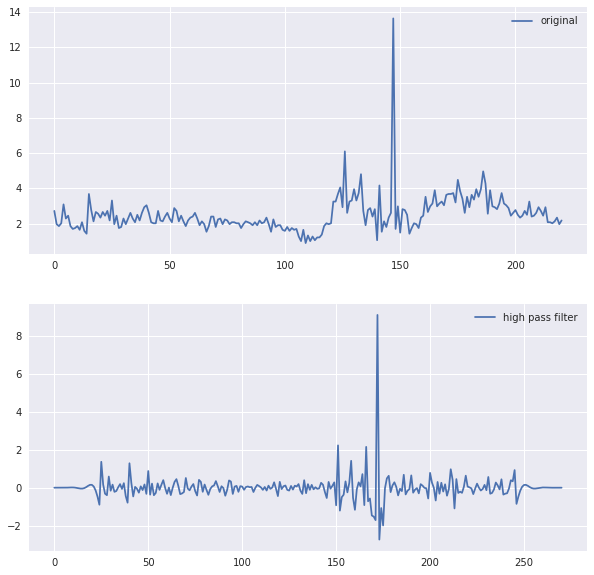

In [5]:
fc = 0.1
b = 0.08
N = int(np.ceil((4 / b)))
if not N % 2: N += 1
n = np.arange(N)
 
sinc_func = np.sinc(2 * fc * (n - (N - 1) / 2.))
window = np.blackman(N)
sinc_func = sinc_func * window
sinc_func = sinc_func / np.sum(sinc_func)

# reverse function
sinc_func = -sinc_func
sinc_func[(N - 1) // 2] += 1

s = list(df['10 Min Std Dev'])
new_signal = np.convolve(s, sinc_func)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(list(df['10 Min Std Dev']),label='original')
plt.legend()
plt.subplot(2,1,2)
plt.plot(new_signal,label='high pass filter')
plt.legend()
plt.show()

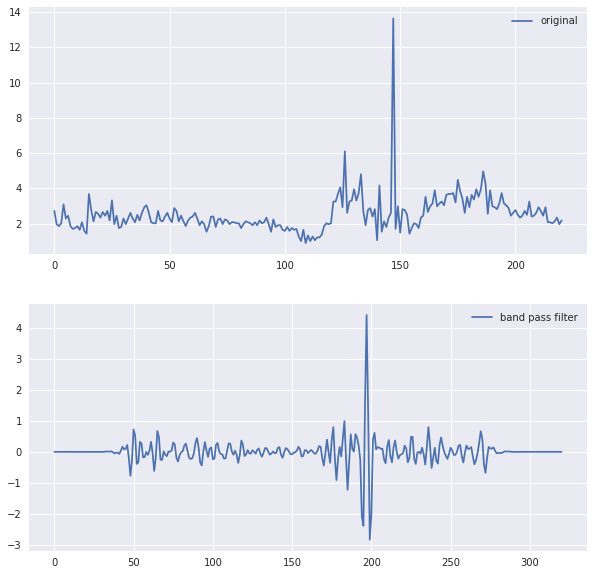

In [6]:
fL = 0.1
fH = 0.3
b = 0.08
N = int(np.ceil((4 / b)))
if not N % 2: N += 1  # Make sure that N is odd.
n = np.arange(N)
 
# low-pass filter
hlpf = np.sinc(2 * fH * (n - (N - 1) / 2.))
hlpf *= np.blackman(N)
hlpf = hlpf / np.sum(hlpf)
 
# high-pass filter 
hhpf = np.sinc(2 * fL * (n - (N - 1) / 2.))
hhpf *= np.blackman(N)
hhpf = hhpf / np.sum(hhpf)
hhpf = -hhpf
hhpf[(N - 1) // 2] += 1
 
h = np.convolve(hlpf, hhpf)
s = list(df['10 Min Std Dev'])
new_signal = np.convolve(s, h)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(list(df['10 Min Std Dev']),label='original')
plt.legend()
plt.subplot(2,1,2)
plt.plot(new_signal,label='band pass filter')
plt.legend()
plt.show()